<a href="https://colab.research.google.com/github/Mnikito/INTRO_ML/blob/main/HW5/4105_HW5_FULL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# HW 5 Problem 1
# Modified Temperature Prediction Model

### Problem 1

In our temperature prediction example, let’s change our model to a non-linear system. Consider the following description for our model:

w2 * t_u ** 2 + w1 * t_u + b.

1.a Modify the training loop properly to accommodate this redefinition. 

1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [6]:
# Setting Up
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
from matplotlib import pyplot as plt
import torch.nn as nn
from collections import OrderedDict

torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

Creating the MODEL

In [7]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [8]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

Training Loop

In [12]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

Learning Rate: 0.1
Epoch 1, Training loss 114.2229, Validation loss 417.1553
Epoch 500, Training loss 56.2211, Validation loss 193.2464
Epoch 1000, Training loss 56.2218, Validation loss 193.2487
Epoch 1500, Training loss 56.2209, Validation loss 193.2472
Epoch 2000, Training loss 56.2242, Validation loss 193.2493
Epoch 2500, Training loss 56.2227, Validation loss 193.2493
Epoch 3000, Training loss 56.2224, Validation loss 193.2492
Epoch 3500, Training loss 56.2222, Validation loss 193.2492
Epoch 4000, Training loss 56.2221, Validation loss 193.2489
Epoch 4500, Training loss 56.2219, Validation loss 193.2487
Epoch 5000, Training loss 56.2216, Validation loss 193.2481



Learning Rate: 0.01
Epoch 1, Training loss 113.0329, Validation loss 416.0309
Epoch 500, Training loss 7.2831, Validation loss 67.4558
Epoch 1000, Training loss 5.9122, Validation loss 47.6345
Epoch 1500, Training loss 5.2288, Validation loss 33.7642
Epoch 2000, Training loss 3.9793, Validation loss 24.6178
Epoch 2500, 

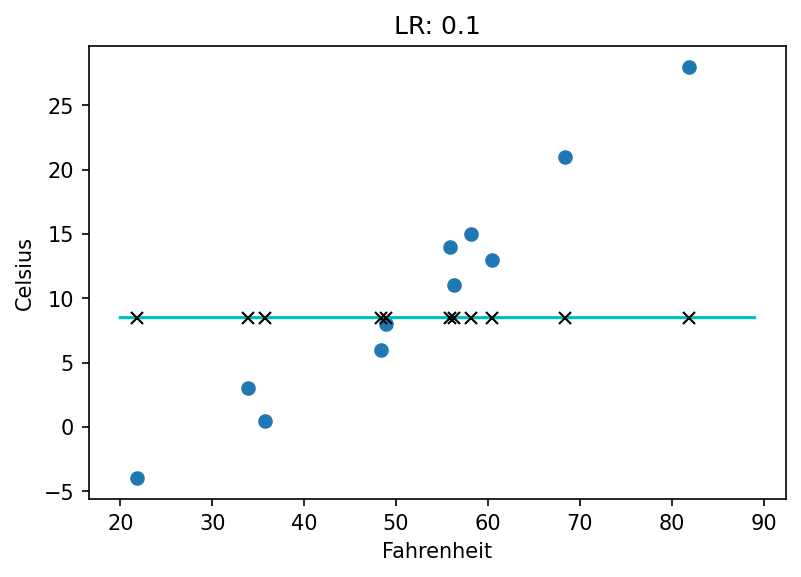

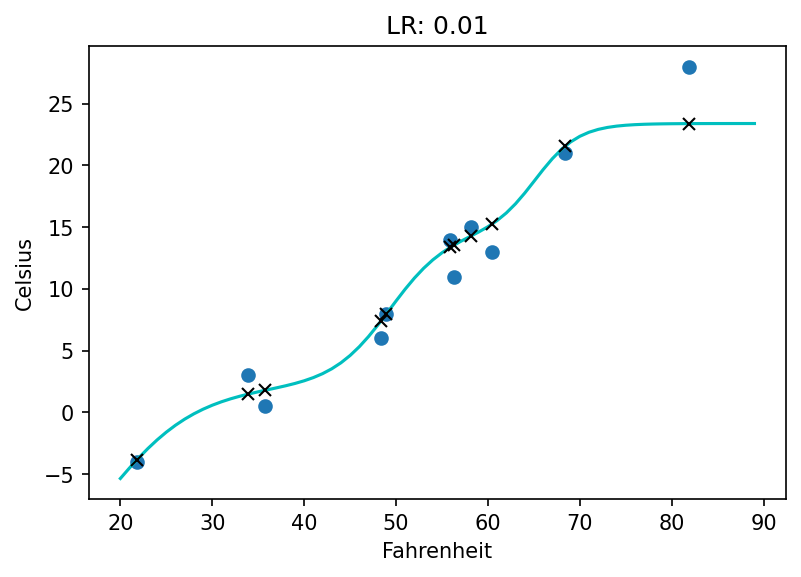

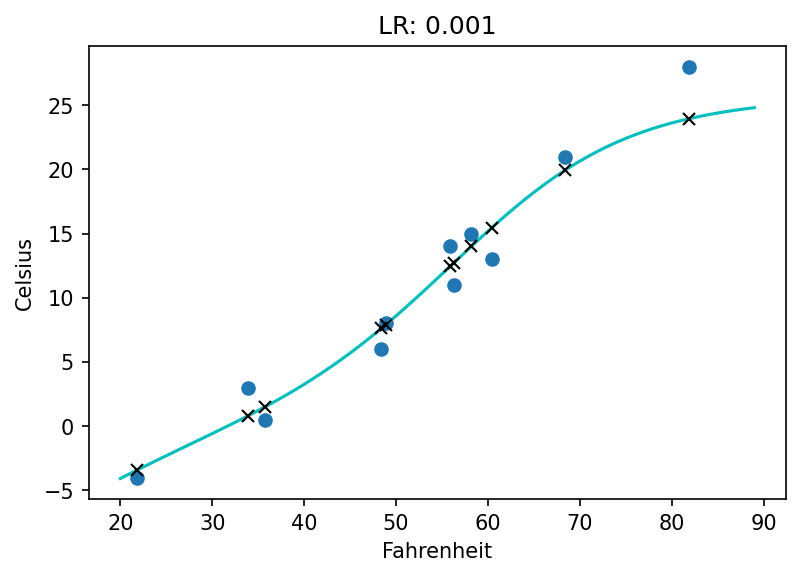

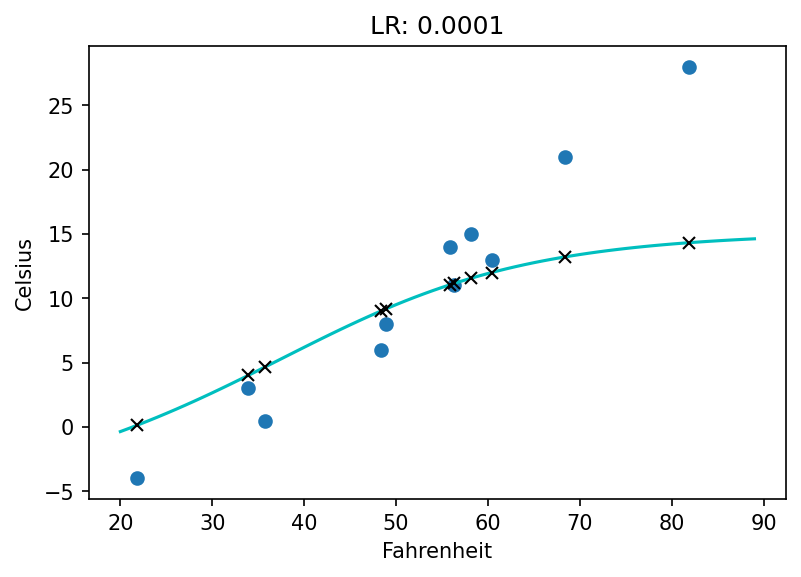

In [14]:
LRs = [0.1,0.01,0.001,0.0001]

neuron_count = 8

for LR in LRs:
  seq_model = nn.Sequential(OrderedDict([
      ('hidden_linear', nn.Linear(1, neuron_count)),
      ('hidden_activation', nn.Tanh()),
      ('output_linear', nn.Linear(neuron_count, 1))
  ]))

  optimizer = optim.SGD(seq_model.parameters(), lr=LR)

  print(f"Learning Rate: {LR}")

  training_loop(
      n_epochs = 5000, 
      optimizer = optimizer,
      model = seq_model,
      loss_fn = nn.MSELoss(),
      t_u_train = t_un_train,
      t_u_val = t_un_val, 
      t_c_train = t_c_train,
      t_c_val = t_c_val)
  print("\n\n")
  from matplotlib import pyplot as plt

  t_range = torch.arange(20., 90.).unsqueeze(1)

  fig = plt.figure(dpi=150)
  plt.xlabel("Fahrenheit")
  plt.ylabel("Celsius")
  plt.plot(t_u.numpy(), t_c.numpy(), 'o')
  plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
  plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
  plt.title(f"LR: {LR}")

### Problem 3

2.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

For this, you need to use the housing dataset. For training and validation use 80% (training) and 20% (validation) split. Identify the best parameters for your linear regression model, based on the above input variables. In this case, you will have six parameters:

U=W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B

2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per each training. Pick the best linear model.

In [15]:
import imageio
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

In [16]:
#Reading training data
import pandas as pd
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [18]:
def model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, w1, w2, w3, w4, w5, b):
    return w5*t_parking + w4*t_stories + w3*t_bathrooms + w2*t_bedrooms + w1*t_area + b

In [19]:
#Price Predicition
t_area = torch.tensor(Newtrain['area'])
t_bedrooms = torch.tensor(Newtrain['bedrooms'])
t_bathrooms = torch.tensor(Newtrain['bathrooms'])
t_stories = torch.tensor(Newtrain['stories'])
t_parking = torch.tensor(Newtrain['parking'])
t_price = torch.tensor(Newtrain['price'])
#Normalized
t_areaN = t_area * 0.1
t_bedroomsN = t_bedrooms * 0.1
t_bathroomsN = t_bathrooms * 0.1
t_storiesN = t_stories * 0.1
t_parkingN = t_parking * 0.1

In [21]:
#Calculating the loss
def loss_fn(t_p, t_price):
    squared_diffs = (t_p - t_price)**2
    return squared_diffs.mean()

params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True)

def training_loop(n_epochs, learning_rate, params, t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, t_price):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_area, t_bedrooms, t_bathrooms, t_stories, t_parking, *params) 
        loss = loss_fn(t_p, t_price)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [22]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-6, 
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1> 
    t_area = t_areaN,
    t_bedrooms = t_bedroomsN,
    t_bathrooms = t_bathroomsN,
    t_stories = t_storiesN,
    t_parking = t_parkingN,
    t_price = t_price)

Epoch 500, Loss 3346414436352.000000
Epoch 1000, Loss 3346076794880.000000
Epoch 1500, Loss 3345739153408.000000
Epoch 2000, Loss 3345402036224.000000
Epoch 2500, Loss 3345065181184.000000
Epoch 3000, Loss 3344728064000.000000
Epoch 3500, Loss 3344390946816.000000
Epoch 4000, Loss 3344054353920.000000
Epoch 4500, Loss 3343717761024.000000
Epoch 5000, Loss 3343381430272.000000


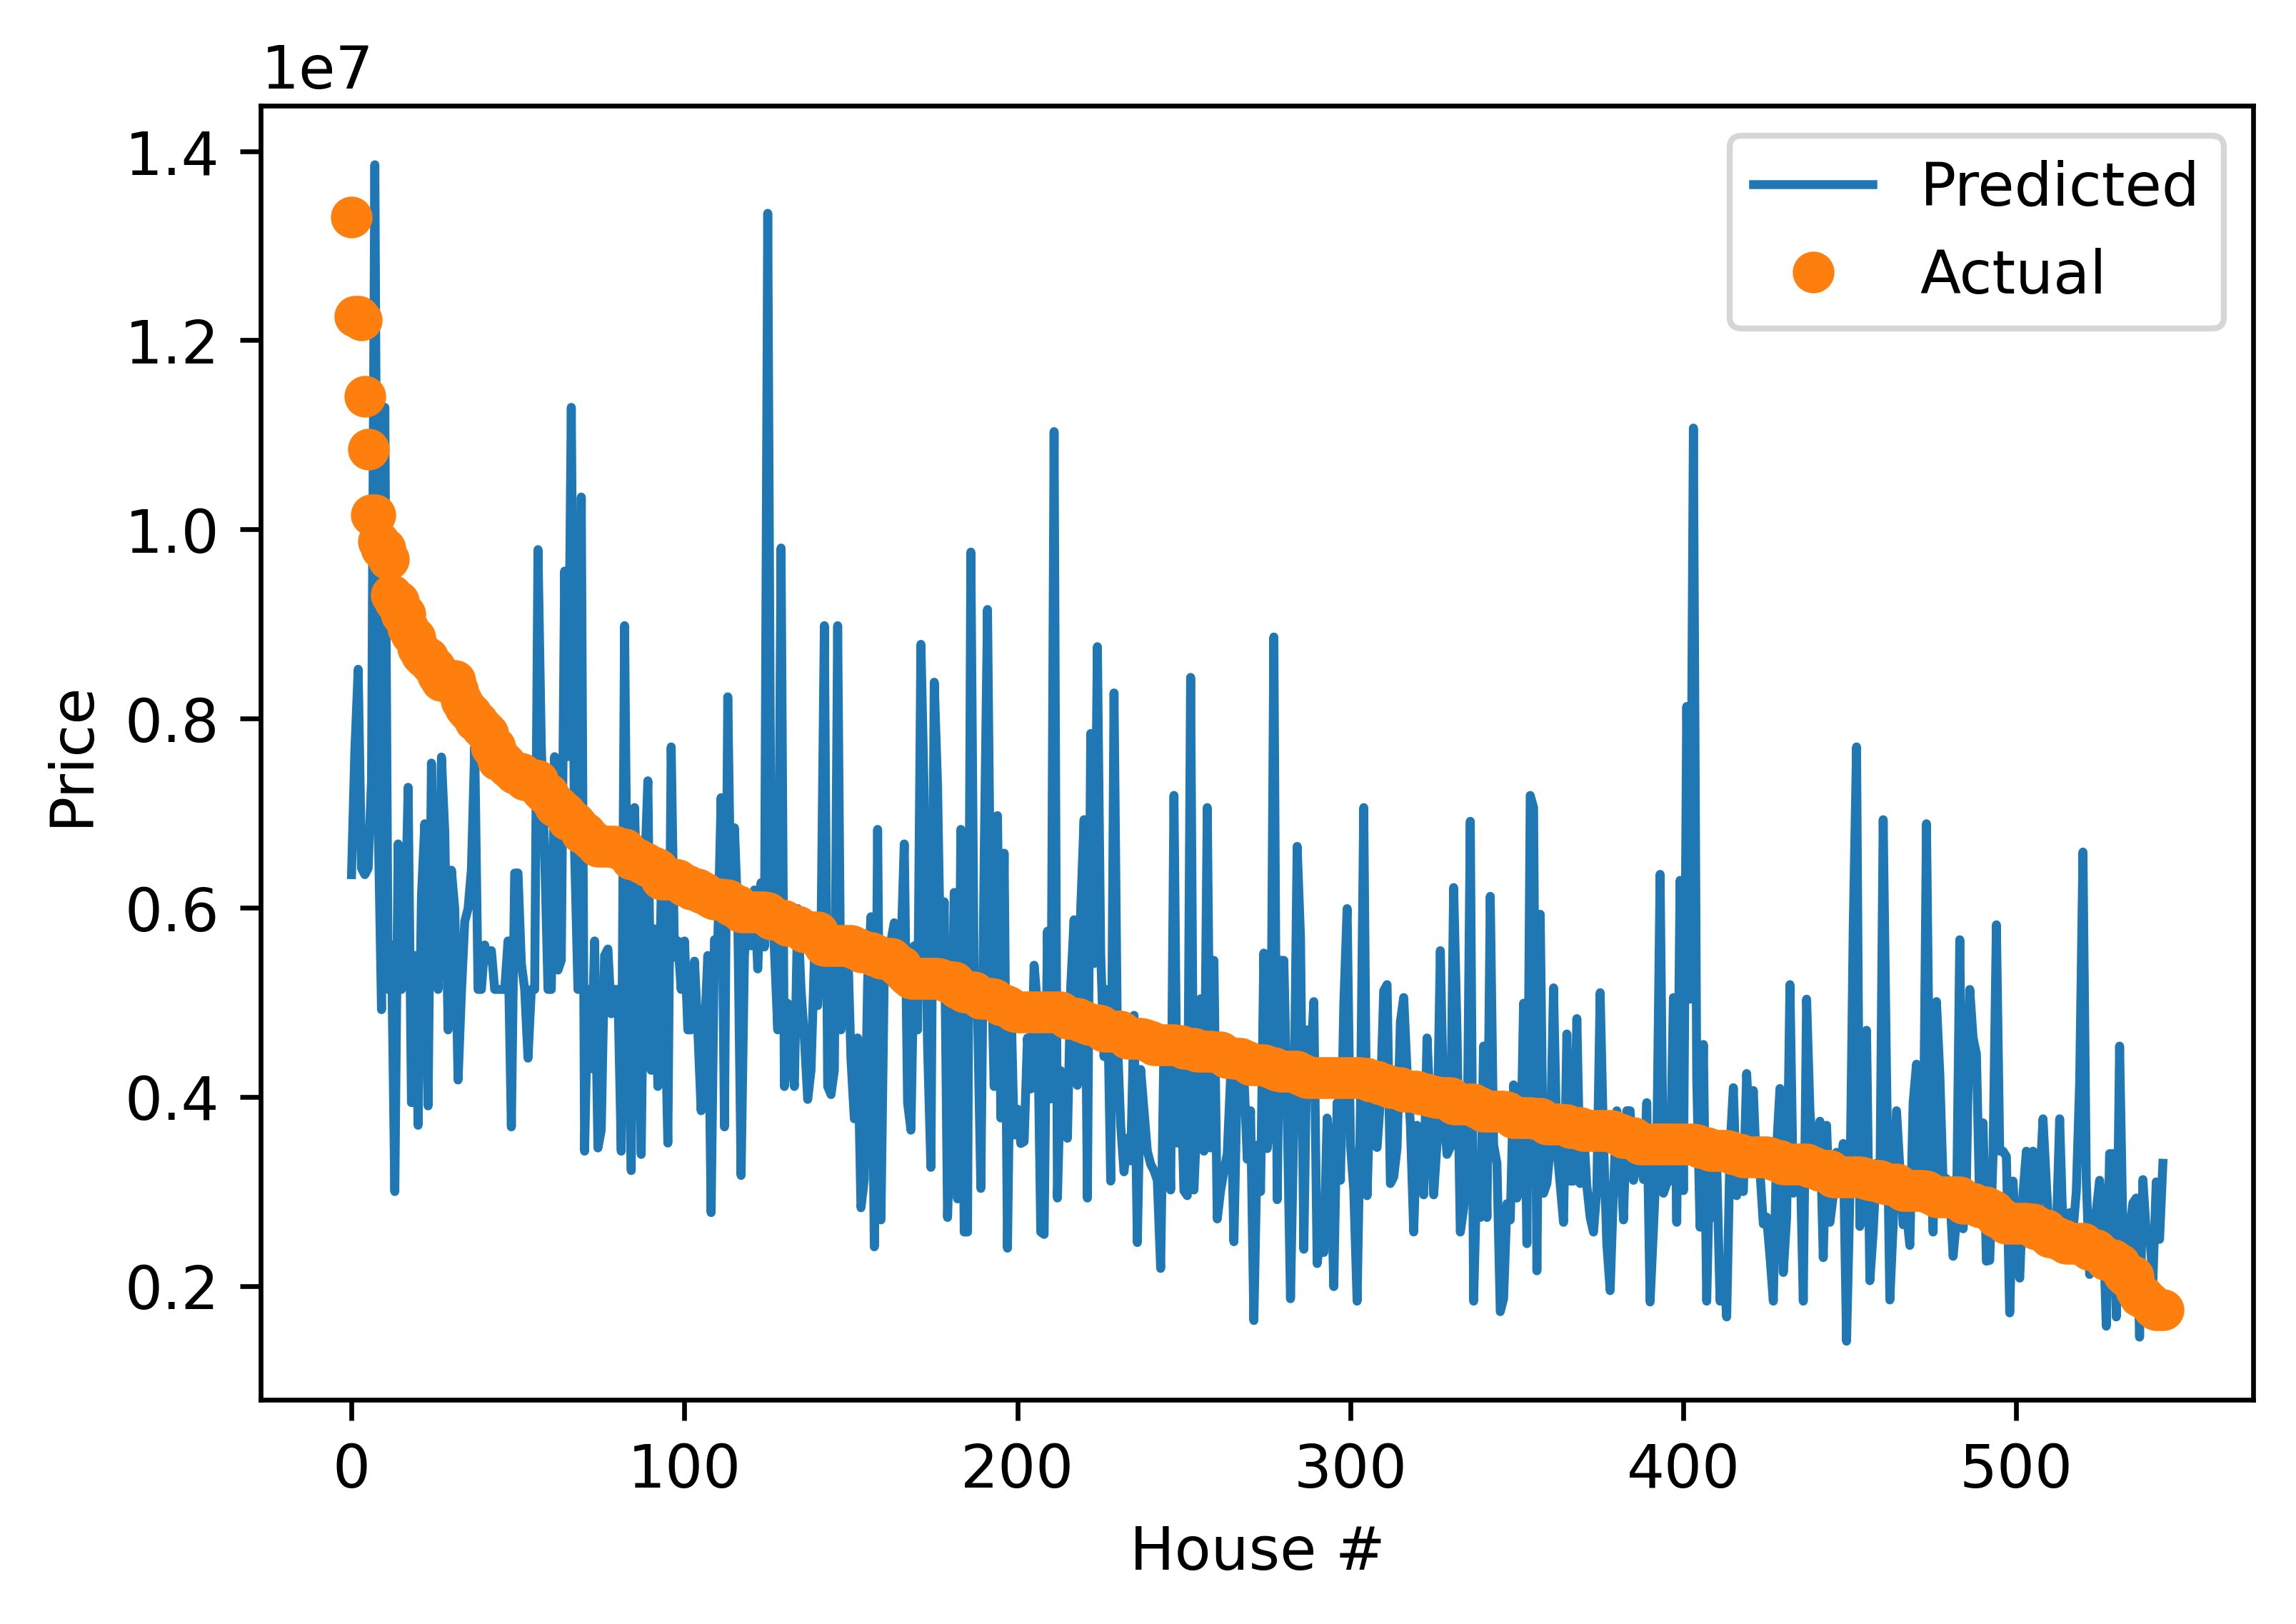

In [23]:
%matplotlib inline
t_p = model(t_areaN, t_bedroomsN, t_bathroomsN, t_storiesN, t_parkingN, *params)
fig = plt.figure(dpi=600)
plt.xlabel("House #")
plt.ylabel("Price")
plt.plot(t_p.detach().numpy())
plt.plot(t_price.numpy(), 'o')
plt.legend(['Predicted', 'Actual'])

### Problem 3

3.a Build a fully connected neural network for the housing dataset you did in previous problem. For training and validation use 80% (training) and 20% (validation) split. For this part, only use one hidden layer with 8 nodes. Train your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the GitHub URL of your course repository for this course. (15pts)

3.b Extend your network with two more additional hidden layers, like the example we did in lecture. Train your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the GitHub URL of your course repository for this course. Analyze your results in your report and compare your model size and accuracy over the baseline implementation in Problem1. a. Do you see any over-fitting? Make sure to submit your code by providing the GitHub URL of your course repository for this course. (25pts)

In [40]:
#Reading training data
import pandas as pd
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
 
# Defining the map function 
def binary_map(x): 
    return x.map({'yes': 1, "no": 0}) 
 
# Applying the function to the housing list 
housing[varlist] = housing[varlist].apply(binary_map)

import warnings 
warnings.filterwarnings('ignore') 
#Using this for the plot at the end

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] 
t_u = housing[num_vars]
t_u = torch.FloatTensor(t_u.values)
t_price = torch.FloatTensor(housing['price'])
t_price = torch.tensor(t_price).unsqueeze(1)

from sklearn.preprocessing import MinMaxScaler, StandardScaler 

scaler = MinMaxScaler() 
t_u_n = torch.FloatTensor(scaler.fit_transform(t_u))


t_price_n = torch.FloatTensor(MinMaxScaler().fit_transform(t_price))


#Splitting the Data into Training and Testing Sets 
from sklearn.model_selection import train_test_split 


df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state=7)

#Filtering out unneeded Yes and No variables

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
df_Newtrain = df_train[num_vars] 
df_Newtest = df_test[num_vars]

y_train = df_Newtrain.pop('price') 
x_train = df_Newtrain 
y_valid = df_Newtest.pop('price') 
x_valid = df_Newtest

y_train = torch.FloatTensor(y_train)
y_valid = torch.FloatTensor(np.array(y_valid))

y_train = torch.tensor(y_train).unsqueeze(1)
y_valid = torch.tensor(y_valid).unsqueeze(1)

# define standard scaler 
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
Y_NormTrain = torch.FloatTensor(scaler.fit_transform(y_train))
X_NormTrain = torch.FloatTensor(scaler.fit_transform(df_Newtrain))
Y_NormValid = torch.FloatTensor(scaler.fit_transform(y_valid))
X_NormValid = torch.FloatTensor(scaler.fit_transform(df_Newtest))

In [41]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 20 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [42]:
# Model and Training HERE

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(5, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=2e-1)

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = X_NormTrain,
    t_u_val = X_NormValid, 
    t_c_train = Y_NormTrain,
    t_c_val = Y_NormValid)

Epoch 1, Training loss 0.0282, Validation loss 0.0357
Epoch 20, Training loss 0.0190, Validation loss 0.0236
Epoch 40, Training loss 0.0181, Validation loss 0.0221
Epoch 60, Training loss 0.0173, Validation loss 0.0209
Epoch 80, Training loss 0.0167, Validation loss 0.0200
Epoch 100, Training loss 0.0162, Validation loss 0.0192
Epoch 120, Training loss 0.0157, Validation loss 0.0185
Epoch 140, Training loss 0.0153, Validation loss 0.0179
Epoch 160, Training loss 0.0149, Validation loss 0.0174
Epoch 180, Training loss 0.0145, Validation loss 0.0170
Epoch 200, Training loss 0.0142, Validation loss 0.0166


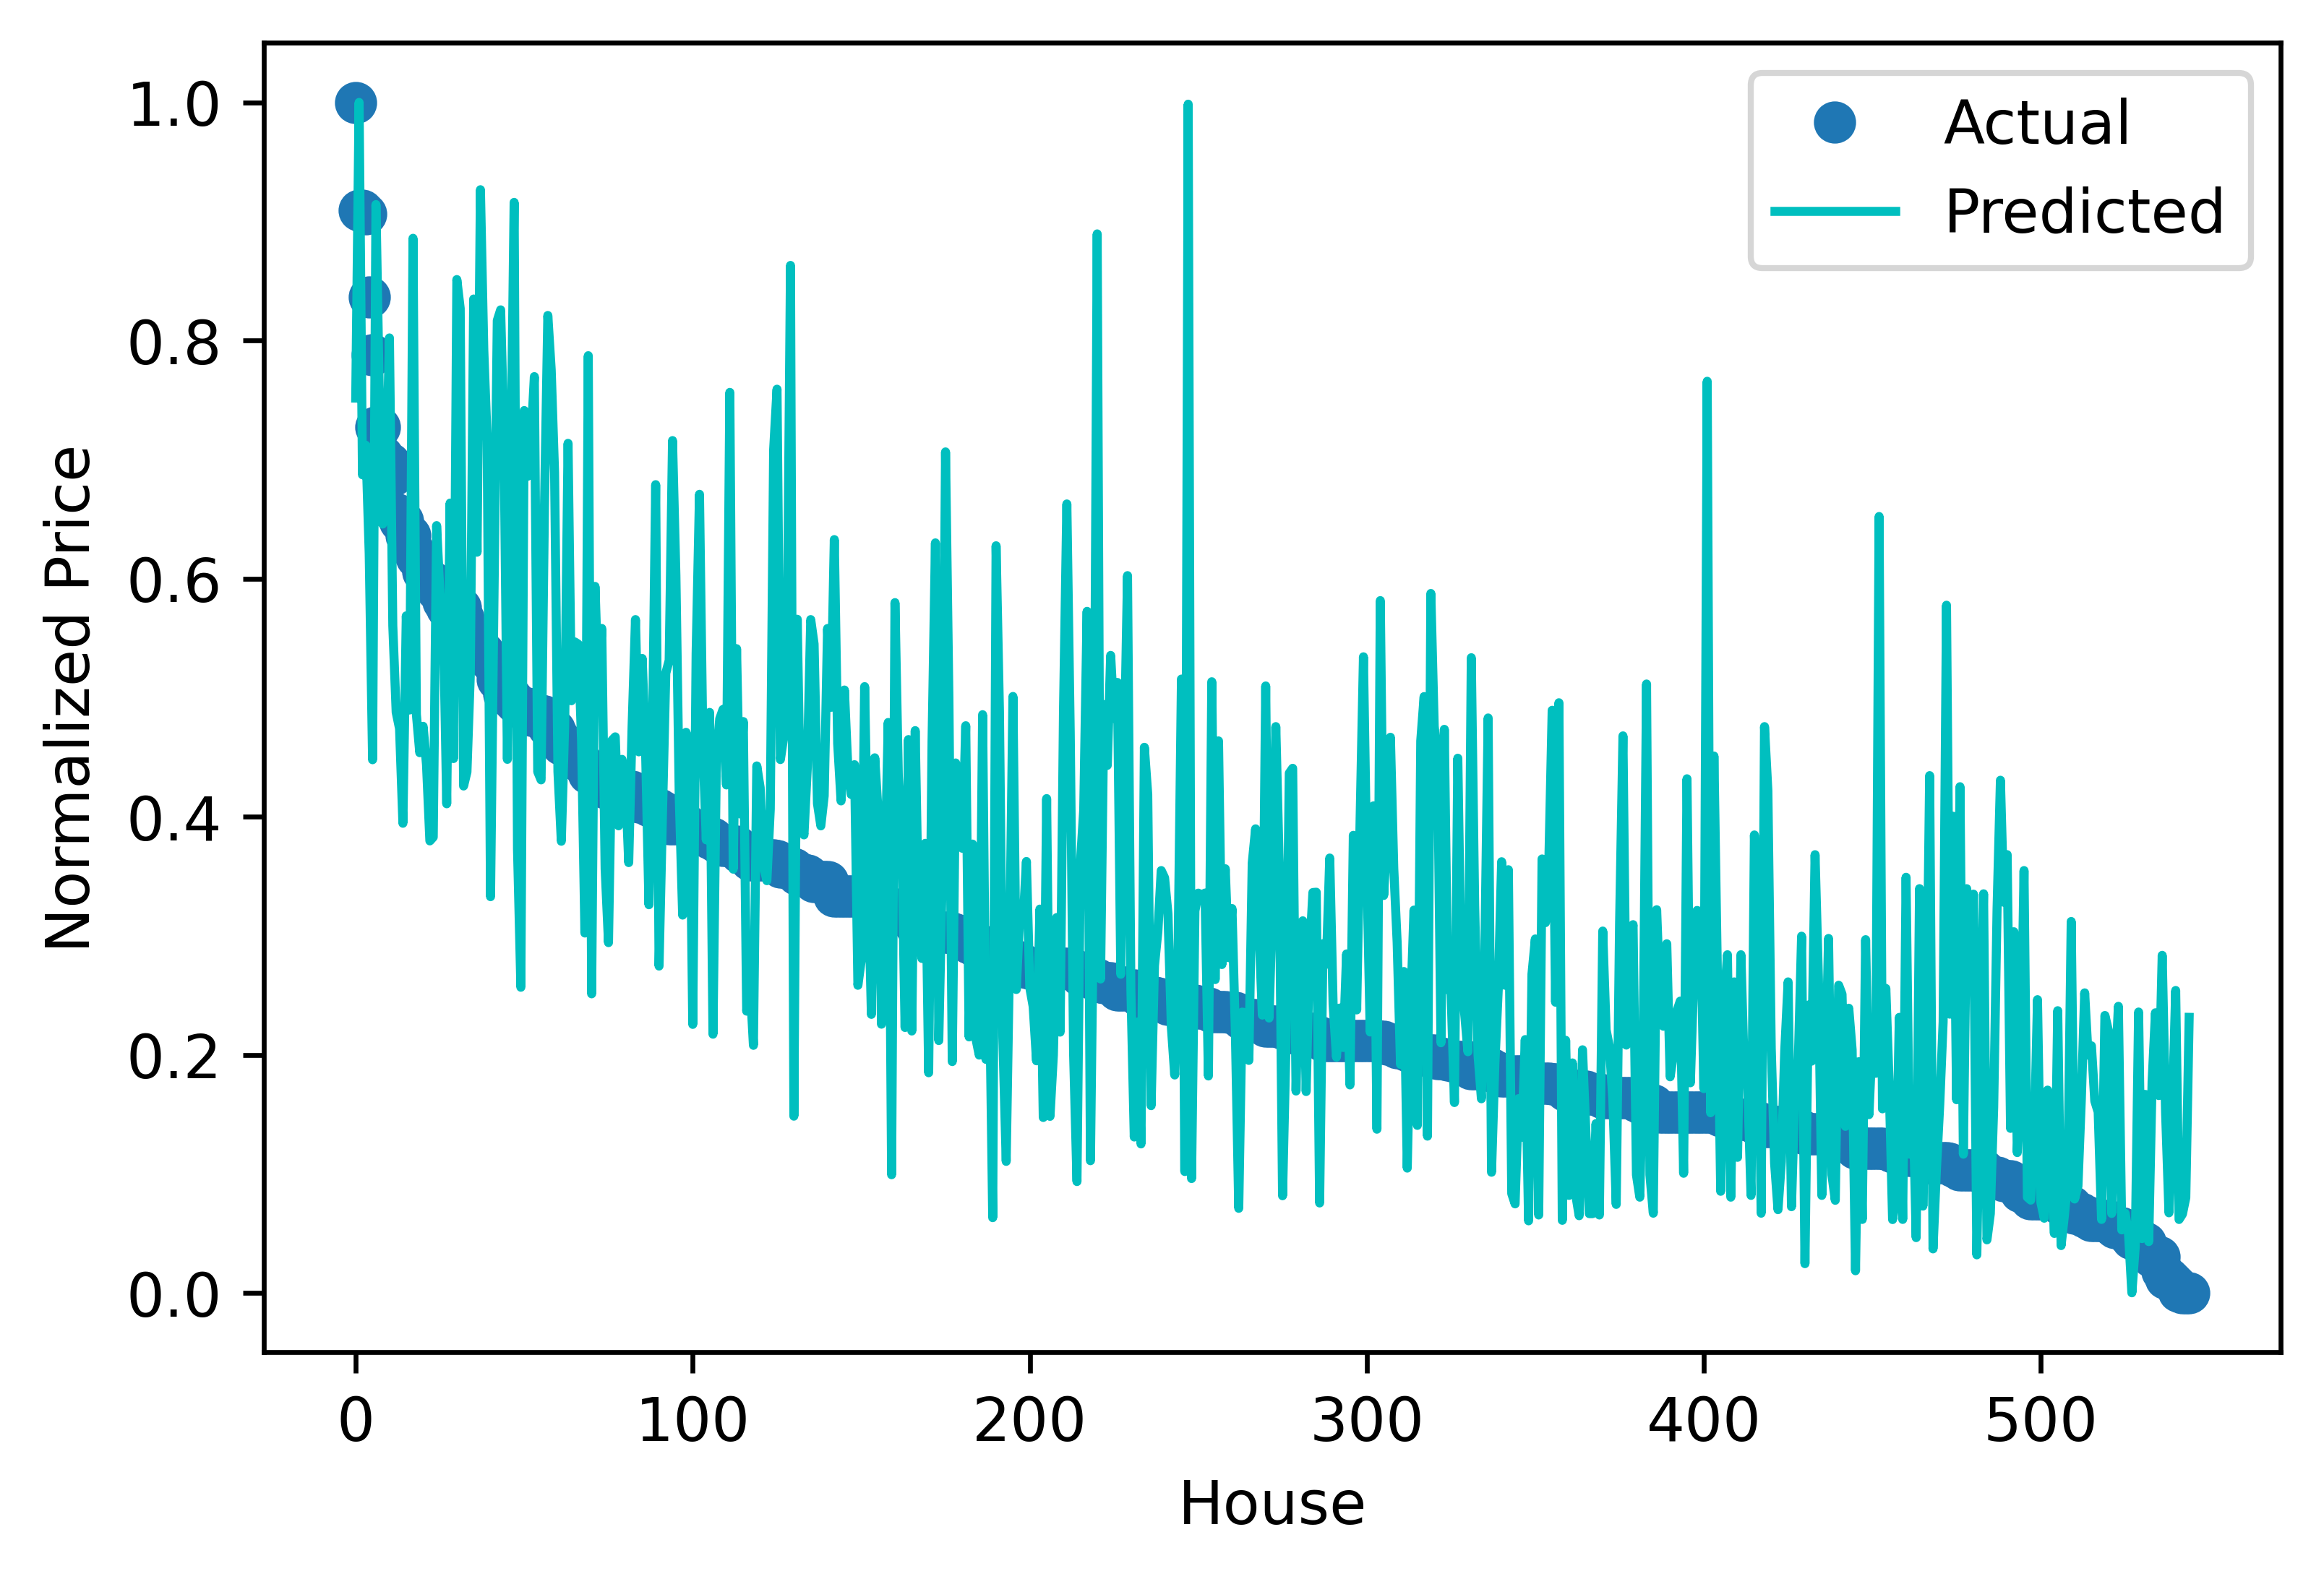

In [43]:
t_p = seq_model(t_u_n)
t_p = torch.FloatTensor(scaler.fit_transform(t_p.detach().numpy()))
fig = plt.figure(dpi=600)
plt.xlabel("House")
plt.ylabel("Normalized Price")
plt.plot(t_price_n.numpy(), 'o')
plt.plot(t_p.detach().numpy(), '-c')
plt.legend(['Actual', 'Predicted'])

3.b Extend your network with two more additional hidden layers, like the example we did in lecture. Train your network for 200 epochs. Report your training time, training loss, and evaluation accuracy after 200 epochs. Analyze your results in your report. Make sure to submit your code by providing the GitHub URL of your course repository for this course. Analyze your results in your report and compare your model size and accuracy over the baseline implementation in Problem1. a. Do you see any over-fitting? Make sure to submit your code by providing the GitHub URL of your course repository for this course. (25pts)

In [44]:
#Reading training data
import pandas as pd
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
 
# Defining the map function 
def binary_map(x): 
    return x.map({'yes': 1, "no": 0}) 
 
# Applying the function to the housing list 
housing[varlist] = housing[varlist].apply(binary_map)

import warnings 
warnings.filterwarnings('ignore') 
#Using this for the plot at the end

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] 
t_u = housing[num_vars]
t_u = torch.FloatTensor(t_u.values)
t_price = torch.FloatTensor(housing['price'])
t_price = torch.tensor(t_price).unsqueeze(1)

from sklearn.preprocessing import MinMaxScaler, StandardScaler 

scaler = MinMaxScaler() 
t_u_n = torch.FloatTensor(scaler.fit_transform(t_u))


t_price_n = torch.FloatTensor(MinMaxScaler().fit_transform(t_price))


#Splitting the Data into Training and Testing Sets 
from sklearn.model_selection import train_test_split 


df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state=7)

#Filtering out unneeded Yes and No variables

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
df_Newtrain = df_train[num_vars] 
df_Newtest = df_test[num_vars]

y_train = df_Newtrain.pop('price') 
x_train = df_Newtrain 
y_valid = df_Newtest.pop('price') 
x_valid = df_Newtest

y_train = torch.FloatTensor(y_train)
y_valid = torch.FloatTensor(np.array(y_valid))

y_train = torch.tensor(y_train).unsqueeze(1)
y_valid = torch.tensor(y_valid).unsqueeze(1)

# define standard scaler 
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
Y_NormTrain = torch.FloatTensor(scaler.fit_transform(y_train))
X_NormTrain = torch.FloatTensor(scaler.fit_transform(df_Newtrain))
Y_NormValid = torch.FloatTensor(scaler.fit_transform(y_valid))
X_NormValid = torch.FloatTensor(scaler.fit_transform(df_Newtest))

In [52]:
# Model and Training HERE

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 20 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

# Model and Training HERE

seq_model = nn.Sequential(
    nn.Linear(5, 64),
    nn.Tanh(),
    nn.Linear(64, 16),
    nn.Tanh(),
    nn.Linear(16, 8),
    nn.Tanh(),
    nn.Linear(8, 1))



optimizer = optim.SGD(seq_model.parameters(), lr=2e-1)

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = X_NormTrain,
    t_u_val = X_NormValid, 
    t_c_train = Y_NormTrain,
    t_c_val = Y_NormValid)

Epoch 1, Training loss 0.1395, Validation loss 0.1534
Epoch 20, Training loss 0.0207, Validation loss 0.0234
Epoch 40, Training loss 0.0171, Validation loss 0.0188
Epoch 60, Training loss 0.0149, Validation loss 0.0158
Epoch 80, Training loss 0.0137, Validation loss 0.0142
Epoch 100, Training loss 0.0131, Validation loss 0.0135
Epoch 120, Training loss 0.0127, Validation loss 0.0133
Epoch 140, Training loss 0.0123, Validation loss 0.0133
Epoch 160, Training loss 0.0121, Validation loss 0.0134
Epoch 180, Training loss 0.0119, Validation loss 0.0135
Epoch 200, Training loss 0.0118, Validation loss 0.0137


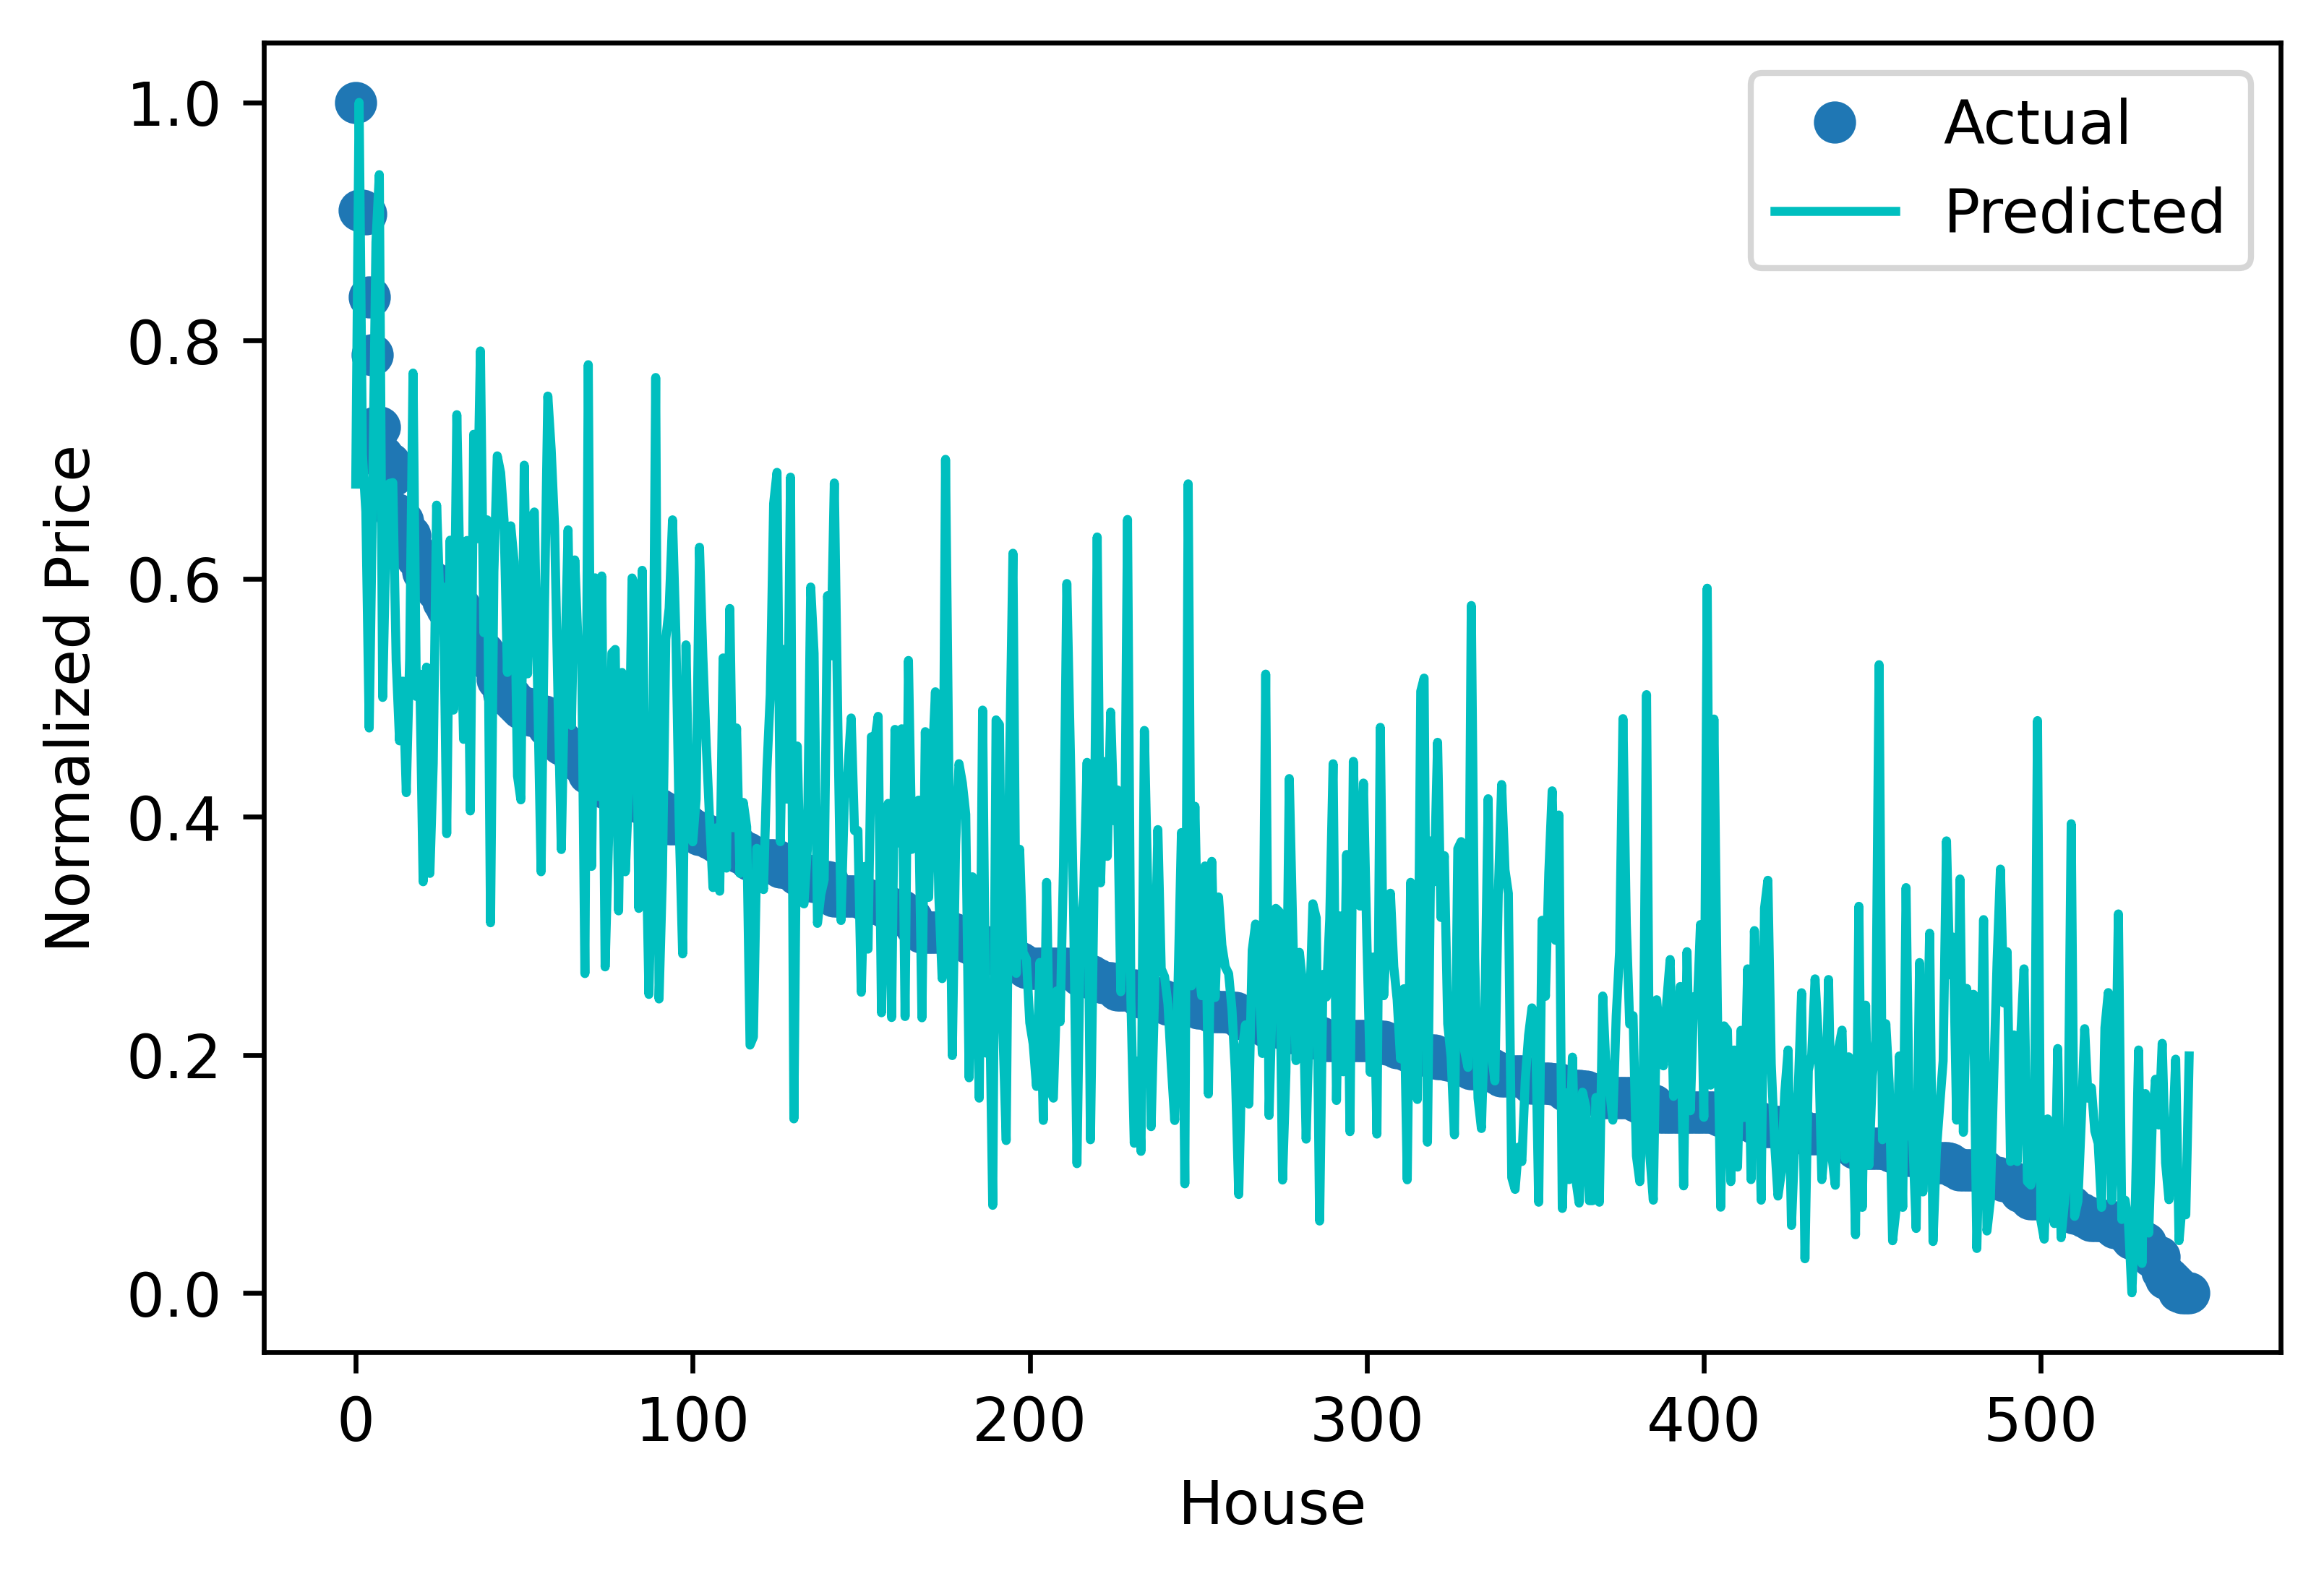

In [53]:
t_p = seq_model(t_u_n)
t_p = torch.FloatTensor(scaler.fit_transform(t_p.detach().numpy()))
fig = plt.figure(dpi=600)
plt.xlabel("House")
plt.ylabel("Normalized Price")
plt.plot(t_price_n.numpy(), 'o')
plt.plot(t_p.detach().numpy(), '-c')
plt.legend(['Actual', 'Predicted'])